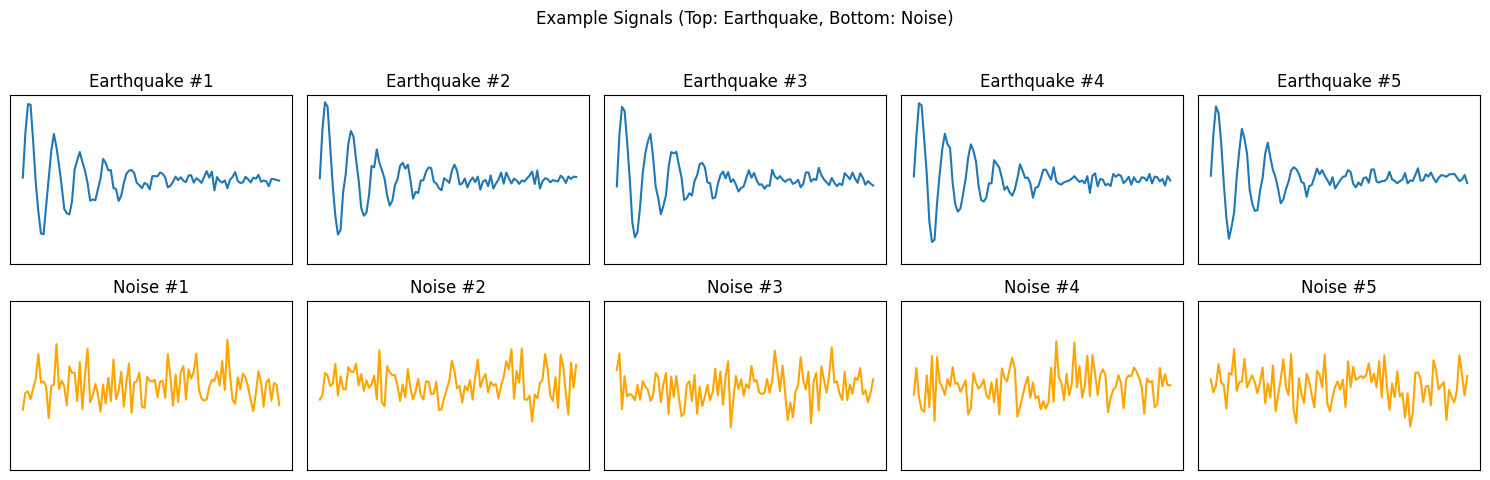

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 98, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 49, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 47, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       147,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,838 (600.93 KB)

 Trainable params: 153,838 (600.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9311 - loss: 0.4462 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 2.2345e-04
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.1264e-04 - val_accuracy: 1.0000 - val_loss: 1.1077e-04
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 1.3348e-04 - val_accuracy: 1.0000 - val_loss: 9.0049e-05
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 1.0499e-04 - val_accuracy: 1.0000 - val_loss: 7.8476e-05
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 8.4432e-05 - val_accuracy: 1.0000 - val_loss: 6.8887e-05
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 8.1986e-05 - val_accuracy: 1.0000 - val_loss: 6.0662e-05
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.00

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


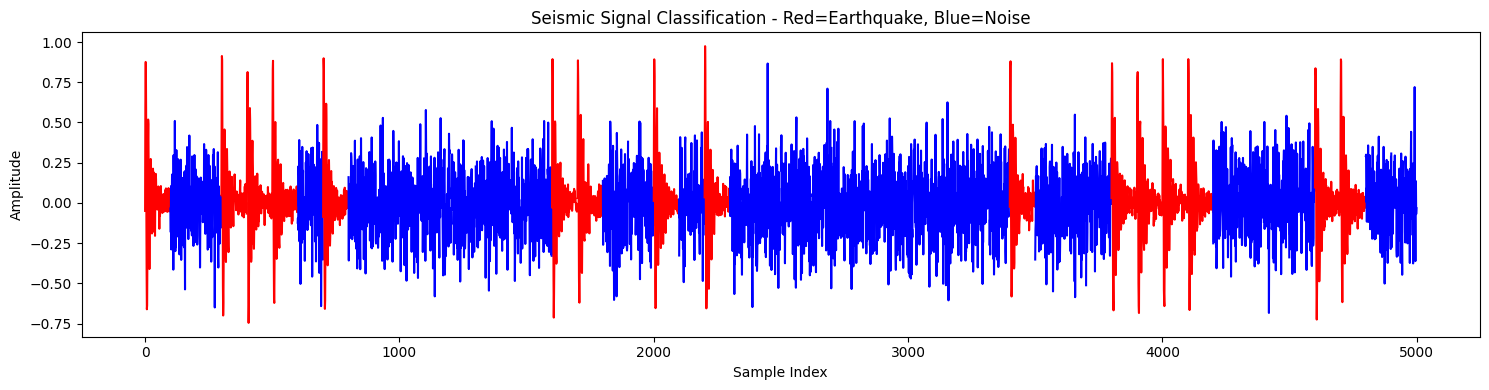

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

np.random.seed(42)

# ----- Step 1: Synthetic Signal Generator -----

def generate_earthquake_signal(length):
    t = np.linspace(0, 1, length)
    signal = np.sin(20 * np.pi * t) * np.exp(-5 * t)  # Damped sinusoid burst
    noise = np.random.normal(0, 0.05, length)
    return signal + noise

def generate_noise_signal(length):
    return np.random.normal(0, 0.2, length)

def generate_mixed_signal(total_length, window_size):
    signal = []
    labels = []
    num_windows = total_length // window_size

    for _ in range(num_windows):
        if np.random.rand() < 0.3:  # 30% chance for earthquake, 70% noise
            seg = generate_earthquake_signal(window_size)
            label = 'earthquake'
        else:
            seg = generate_noise_signal(window_size)
            label = 'noise'
        signal.extend(seg)
        labels.append(label)

    return np.array(signal), np.array(labels)

# ----- Step 2: Prepare Training Dataset -----

window_size = 100
num_samples_per_class = 500

X = []
y = []

for _ in range(num_samples_per_class):
    X.append(generate_earthquake_signal(window_size))
    y.append('earthquake')

    X.append(generate_noise_signal(window_size))
    y.append('noise')

X = np.array(X)
y = np.array(y)

# --- New: Visualize 5 examples per class ---

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.suptitle("Example Signals (Top: Earthquake, Bottom: Noise)")

# Plot 5 earthquake signals
earthquake_indices = np.where(y == 'earthquake')[0][:5]
for i, idx in enumerate(earthquake_indices):
    axs[0, i].plot(X[idx])
    axs[0, i].set_title(f"Earthquake #{i+1}")
    axs[0, i].set_ylim([-1, 1])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])

# Plot 5 noise signals
noise_indices = np.where(y == 'noise')[0][:5]
for i, idx in enumerate(noise_indices):
    axs[1, i].plot(X[idx], color='orange')
    axs[1, i].set_title(f"Noise #{i+1}")
    axs[1, i].set_ylim([-1, 1])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Reshape for CNN input
X = X.reshape((X.shape[0], window_size, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# ----- Step 3: Build CNN Model -----

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: earthquake, noise

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----- Step 4: Train CNN -----

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# ----- Step 5: Create Long Mixed Signal and Classify Windows -----

total_length = 5000  # Total signal length (e.g., 5000 samples)
full_signal, true_window_labels = generate_mixed_signal(total_length, window_size)

# Split the full signal into windows for classification
windows = []
for i in range(0, len(full_signal), window_size):
    window = full_signal[i:i + window_size]
    if len(window) == window_size:
        windows.append(window)
windows = np.array(windows).reshape((-1, window_size, 1))

# Predict window labels
predictions = model.predict(windows)
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# ----- Step 6: Visualization of classified full signal -----

plt.figure(figsize=(15, 4))
for i, label in enumerate(predicted_labels):
    start = i * window_size
    end = start + window_size
    color = 'red' if label == 'earthquake' else 'blue'
    plt.plot(range(start, end), full_signal[start:end], color=color)

plt.title("Seismic Signal Classification - Red=Earthquake, Blue=Noise")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
